In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [10]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)
print(loss)


tensor(2.2855, grad_fn=<NllLossBackward0>)


In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 3.0504e-03,  3.0504e-03,  3.0504e-03,  ...,  3.0504e-03,
          3.0504e-03,  3.0504e-03],
        [ 1.8470e-04,  1.8470e-04,  1.8470e-04,  ...,  1.8470e-04,
          1.8470e-04,  1.8470e-04],
        [ 6.4774e-04,  6.4774e-04,  6.4774e-04,  ...,  6.4774e-04,
          6.4774e-04,  6.4774e-04],
        ...,
        [ 3.6337e-03,  3.6337e-03,  3.6337e-03,  ...,  3.6337e-03,
          3.6337e-03,  3.6337e-03],
        [-5.9112e-06, -5.9112e-06, -5.9112e-06,  ..., -5.9104e-06,
         -5.9104e-06, -5.9104e-06],
        [ 2.5097e-03,  2.5097e-03,  2.5097e-03,  ...,  2.5097e-03,
          2.5097e-03,  2.5097e-03]])


In [12]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0349, -0.0146, -0.0342,  ..., -0.0055,  0.0305, -0.0318],
        [ 0.0172,  0.0118,  0.0109,  ..., -0.0030,  0.0316, -0.0258],
        [-0.0172,  0.0102, -0.0328,  ...,  0.0099,  0.0273, -0.0139],
        ...,
        [-0.0160,  0.0064,  0.0163,  ...,  0.0199,  0.0325,  0.0270],
        [ 0.0345, -0.0058,  0.0244,  ...,  0.0293,  0.0110, -0.0334],
        [ 0.0184, -0.0342,  0.0210,  ...,  0.0059,  0.0141,  0.0145]],
       requires_grad=True)
Gradient - tensor([[ 2.2577e-03,  2.2577e-03,  2.2577e-03,  ...,  2.2577e-03,
          2.2577e-03,  2.2577e-03],
        [ 4.3389e-04,  4.3389e-04,  4.3389e-04,  ...,  4.3389e-04,
          4.3389e-04,  4.3389e-04],
        [ 4.5559e-04,  4.5559e-04,  4.5559e-04,  ...,  4.5559e-04,
          4.5559e-04,  4.5559e-04],
        ...,
        [ 1.0217e-03,  1.0217e-03,  1.0217e-03,  ...,  1.0217e-03,
          1.0217e-03,  1.0217e-03],
        [ 2.7291e-05,  2.7291e-05,  2.7291e-05,  ...,  2.7291e

In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0349, -0.0146, -0.0342,  ..., -0.0055,  0.0305, -0.0318],
        [ 0.0172,  0.0118,  0.0109,  ..., -0.0030,  0.0316, -0.0258],
        [-0.0172,  0.0102, -0.0328,  ...,  0.0099,  0.0273, -0.0139],
        ...,
        [-0.0160,  0.0064,  0.0163,  ...,  0.0199,  0.0324,  0.0269],
        [ 0.0345, -0.0058,  0.0244,  ...,  0.0293,  0.0110, -0.0334],
        [ 0.0185, -0.0342,  0.0210,  ...,  0.0059,  0.0141,  0.0145]],
       requires_grad=True)


In [15]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs=5
for n in range(epochs):
    running_loss=0
    for images, labels in trainloader:

        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

print(loss)

Training loss: 1.0054351981959617
Training loss: 0.3826028228616282
Training loss: 0.32308325957038253
Training loss: 0.2901266733450549
Training loss: 0.264879000228224
tensor(0.1651, grad_fn=<NllLossBackward0>)


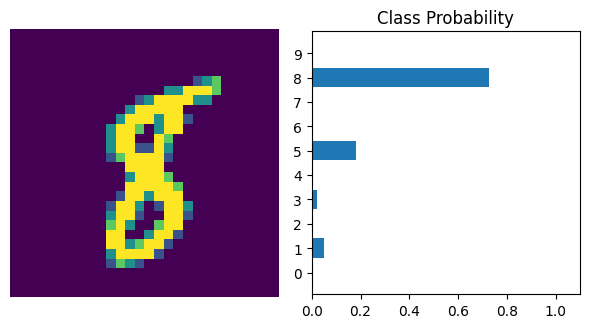

In [16]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)